
## Project: Build a Traffic Sign Recognition Classifier - Model test



---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

signnames = np.genfromtxt('../signnames.csv', dtype=None, delimiter=',', names=True)


print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))
print ("Data Loaded ....")



Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples
Data Loaded ....


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (32, 32)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


print(signnames)

[( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
 ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
 ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
 ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
 ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
 (10, b'No passing for vehicles over 3.5 metric tons')
 (11, b'Right-of-way at the next intersection') (12, b'Priority road')
 (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
 (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
 (18, b'General caution') (19, b'Dangerous curve to the left')
 (20, b'Dangerous curve to the right') (21, b'Double curve')
 (22, b'Bumpy road') (23, b'Slippery road')
 (24, b'Road narrows on the right') (25, b'Road work')
 (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
 (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
 (31, b'Wild animals crossing')
 (32, b'End of all speed and passing limits') (33, b'Turn right a

In [4]:
import random
import numpy as np

## Display images from each of the class types
import cv2
from scipy.misc import toimage



In [5]:
#Preprocess and Augemnt the Data
from keras.utils import np_utils



def normalize(x):
    """
    Normalize a list of  image data in the range of 0 to 1 and mean center it
    : x: List of image data.  The image shape is different for each image
    : return: Numpy array of normalize data
    """
    # = a + (( x - xmin) * ( b - a))/(xmax - xmin)
    # xmax = 255, xmin = 0, a = 0, b = 1
    return (x/255.0 - 0.5)



Using TensorFlow backend.


### Load Saved Model

In [6]:
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K


# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
# Compile model
epochs = 35
learn_rate = 0.01
decay = learn_rate/epochs
sgd = SGD(lr=learn_rate, decay=decay, momentum=0.9)
loaded_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])



Loaded model from disk


In [24]:

# show couple of random images from the given set
def show_output_predictions(preds, features, labels):

    # reverse one hot encoding
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    print("Preds:")
    print(preds)

    #predicted_labels = np.argmax(np.round(preds), axis=1)
    predicted_labels = np.argmax(preds, axis=1)
    print("Prediction Label indices")
    print(predicted_labels)
    
    indices = [i for i, x in enumerate(predicted_labels) ]
    print (indices)
    if len(indices) ==0: 
        return

    # show an image from each class in a grid
    plt.subplots(figsize=(20, 35))
    for i in range(len(labels)):
        image_id = indices[i]
        
        plt.subplot(150 + 1 + i)
        plt.imshow(toimage(features[image_id]))

        label_id = predicted_labels[image_id]
        predicted_title = signnames['SignName'][label_id]

        plt.title("Predicted: {}".format(predicted_title))

### Load and Output the Images

In [25]:
# Load the images and plot them here.
### Feel free to use as many code cells as needed.

from os import listdir
import cv2

plt.close('all')

path = '../images/'
X_new = []

images = listdir(path)
#images = listdir(path + '*.jpg')
for inp in enumerate(images):
    try:
        img = cv2.imread(path + inp[1])
        #img = cv2.resize(img, (32, 32))
        X_new.append(normalize(img))
    except Exception as x:
        continue
        
X_new = np.asarray(X_new)




Preds:
[[ 0.049  0.000  0.000  0.000  0.009  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.941  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000]
 [ 0.000  0.000  0.392  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.002  0.000  0.000  0.000  0.000  0.000  0.000  0.507  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.001  0.001  0.000  0.002  0.000  0.094  0.000
   0.000  0.000  0.000]
 [ 0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000]
 [ 0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000

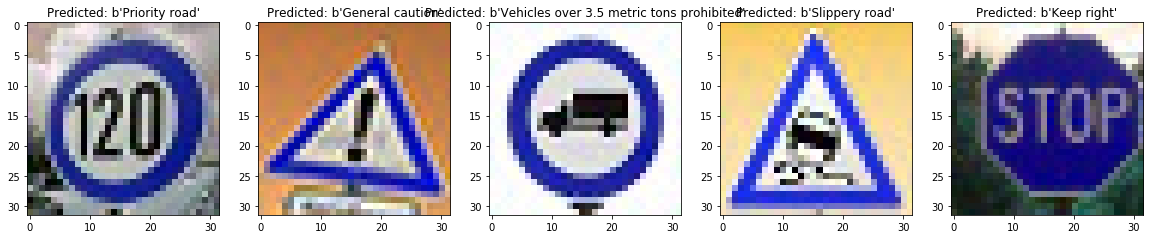

In [26]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

predicts = loaded_model.predict(X_new)
y_new = np.argmax(np.round(predicts), axis=1)

show_output_predictions(predicts, X_new, y_new)

In [27]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

#Only three images from the web are showing proper labels so far, overall accuracy is not that good due to the high noise factor in the training data

correct_labels = 3
test_accuracy = (correct_labels/(len(X_new))*100)
print ("Test run accuracy: {}".format(test_accuracy))

Test run accuracy: 60.0


Preds:
[[ 0.049  0.000  0.000  0.000  0.009  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.941  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000]
 [ 0.000  0.000  0.392  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.002  0.000  0.000  0.000  0.000  0.000  0.000  0.507  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.001  0.001  0.000  0.002  0.000  0.094  0.000
   0.000  0.000  0.000]
 [ 0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000]
 [ 0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000

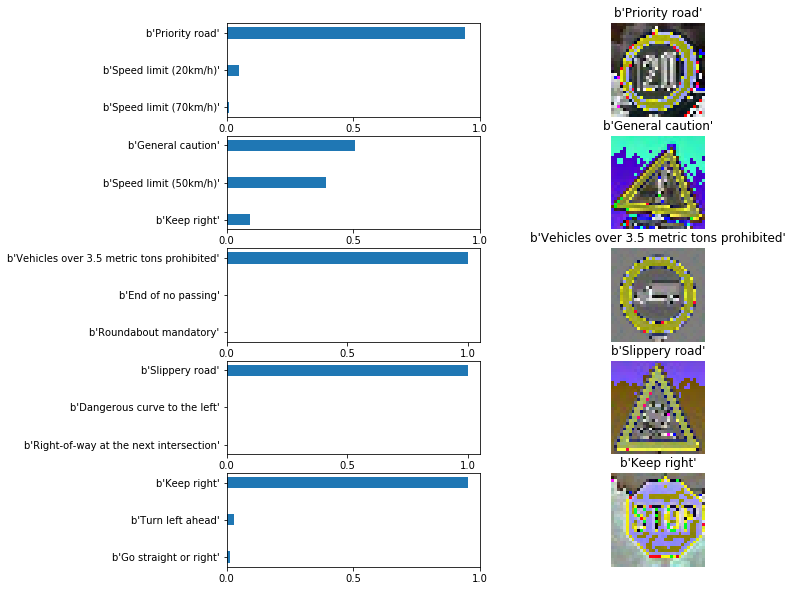

In [34]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import tensorflow as tf

# show couple of random images from the given set
def show_topn_predictions(predictions, features, labels, k=3):
    label_names = signnames['SignName']
    label_ids = signnames['ClassId']

    np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    print("Preds:")
    print(predictions)

    # reverse one hot encoding
    predicted_labels = np.argmax(np.round(predictions), axis=1)
    
    print("Prediction Label indices (rounded)")
    print(predicted_labels)    
    
    #predicted_labels = np.argmax(np.round(predictions), axis=1)
    predicted_labels = np.argmax(predictions, axis=1)
   
    print("Prediction Label indices")
    print(predicted_labels)

    
    with tf.Session() as sess:
        topN = sess.run(tf.nn.top_k(tf.constant(predictions), k=k))
        print(topN)
        #print(predictions)
    
    #return
    
    indices = [i for i, x in enumerate(predicted_labels) ]
    print (indices)
    if len(indices) ==0: 
        return
    
    plt.close('all')
    
    fig, axies = plt.subplots(nrows=len(labels), ncols=2, figsize=(10,10))
    
    n_predictions = k
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, label_ids, topN.indices, topN.values)):
        pred_names = [label_names[pred_i] for pred_i in pred_indicies]
        top_pred = pred_names[0]

        axies[image_i][1].imshow(feature)
        axies[image_i][1].set_title(top_pred)
        axies[image_i][1].set_axis_off()

        axies[image_i][0].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][0].set_yticks(ind + margin)
        axies[image_i][0].set_yticklabels(pred_names[::-1])
        axies[image_i][0].set_xticks([0, 0.5, 1.0])
  
   
    
show_topn_predictions(predicts, X_new, y_new, 3)

In [35]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

from keras.models import Model


test_img = "../images/5.jpg"

def visualize_model_layer_output(layer_name, activation_min=-1, activation_max=-1 ,plt_num=1):
    vixModel = Model(input=loaded_model.input, output=loaded_model.get_layer(layer_name).output)

    img = cv2.imread(test_img)
    #convert to array of single image
    img = np.expand_dims(normalize(img), axis=0)
    #img = np.expand_dims(img, axis=0)

    activation = vixModel.predict(img)
    print("activation features shape: ", activation.shape)
    
    # plot features
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(20,20))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

activation features shape:  (1, 64, 32, 3)


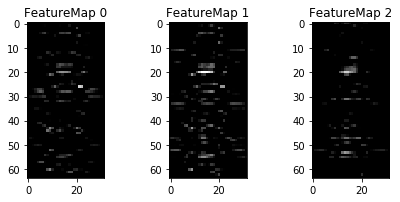

In [30]:
visualize_model_layer_output("drop2", 2, 10, 1)

## Make sure graphviz is installed. 
Follow steps from http://stackoverflow.com/questions/36886711/keras-runtimeerror-failed-to-import-pydot-after-installing-graphviz-and-pyd

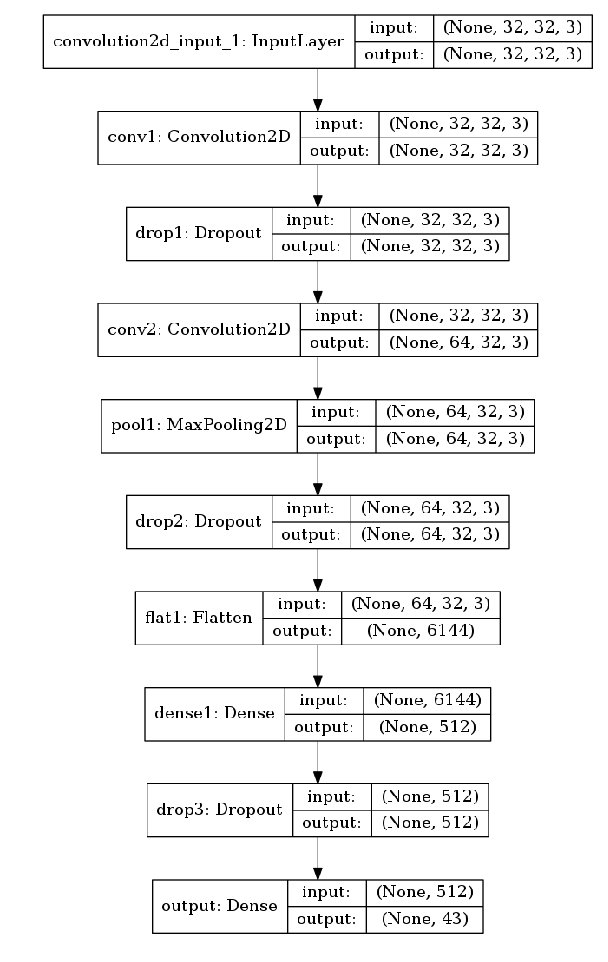

In [31]:
import pydot_ng as pydot
from keras.utils.visualize_util import plot

plot(loaded_model, to_file='model.png', show_shapes=True)

img = cv2.imread('model.png')

# original image
plt.subplots(figsize=(10,20))
plt.subplot(111)
plt.axis('off')
plt.imshow(img)